# Superflux onsets

This notebook demonstrates how to recover the Superflux onset detection algorithm of [Boeck and Widmer, 2013](http://dafx13.nuim.ie/papers/09.dafx2013_submission_12.pdf) from librosa.  This algorithm improves onset detection accuracy in the presence of vibrato.

In [1]:
from __future__ import print_function

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa.display
import sys
try:
    sys.getwindowsversion()
except AttributeError:
    isWindows = False
else:
    isWindows = True

if isWindows:
    import win32api,win32process,win32con
    pid = win32api.GetCurrentProcessId()
    handle = win32api.OpenProcess(win32con.PROCESS_ALL_ACCESS, True, pid)
    win32process.SetPriorityClass(handle, win32process.HIGH_PRIORITY_CLASS)

In [15]:
y, sr = librosa.load('Audio/Are You That Somebody.mp3', sr=44100, duration=2, offset=35)

In [16]:
# Parameters from the paper:

n_fft = 1024
hop_length = int(librosa.time_to_samples(1./200, sr=sr))
lag = 2
n_mels = 138
fmin = 27.5
fmax = 16000.
max_size = 3

In [17]:
hop_length

220

In [18]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, fmin=fmin, fmax=fmax, n_mels=n_mels)

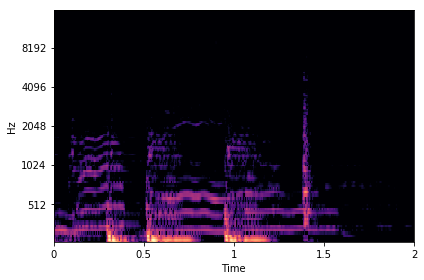

In [19]:
plt.figure(figsize=(6, 4))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr, hop_length=hop_length, fmin=fmin, fmax=fmax)
plt.tight_layout()

In [20]:
odf_default = librosa.onset.onset_strength(y=y, sr=sr)
onset_default = librosa.onset.onset_detect(y=y, sr=sr)

In [21]:
odf_sf = librosa.onset.onset_strength(S=librosa.amplitude_to_db(S), sr=sr, hop_length=hop_length,
                                      lag=lag, max_size=max_size)

onset_sf = librosa.onset.onset_detect(onset_envelope=odf_sf, sr=sr, hop_length=hop_length)

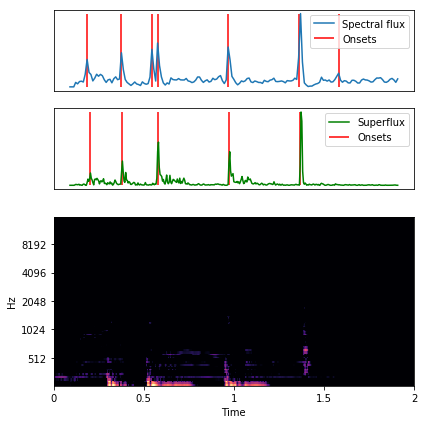

In [22]:
plt.figure(figsize=(6, 6))

plt.subplot(2,1,2)
librosa.display.specshow(librosa.amplitude_to_db(S, top_db=50, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr, hop_length=hop_length, fmin=fmin, fmax=fmax
                        )

plt.subplot(4,1,1)
plt.plot(odf_default, label='Spectral flux')
plt.vlines(onset_default, 0, odf_default.max(), color='r', label='Onsets')
plt.yticks([])
plt.xticks([])
plt.axis('tight')
plt.legend()


plt.subplot(4,1,2)
plt.plot(odf_sf, color='g', label='Superflux')
plt.vlines(onset_sf, 0, odf_sf.max(), color='r', label='Onsets')
plt.xticks([])
plt.yticks([])
plt.legend()
plt.axis('tight')

plt.tight_layout()

# Comments

If you look carefully, the default onset detector (top sub-plot) has several false positives in high-vibrato regions

The superflux method (middle plot) is less susceptible to vibrato, and does not detect onset events at those points.